In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [2]:
#To unzip zipfile

# from zipfile import ZipFile
# file_path = "/content/cats_and_dogs.zip"
# file_name = file_path

# with ZipFile(file_name, 'r') as zip:
#    zip.extractall()
#    print('Done')

In [3]:
# Generating images for the Test set
train_datagen = ImageDataGenerator( rescale = 1.0/255.,rotation_range=40, width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True )

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Creating training set
training_set = train_datagen.flow_from_directory('/content/cats_and_dogs/train',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [6]:
#model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
#Image_Size=(Image_Width,Image_Height)


# model=Sequential()

# model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128, 128, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(2,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='Adam',
               loss='binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
history = model.fit(training_set,
                    steps_per_epoch=30, 
                    epochs=200, 
                    validation_data=test_set, 
                    validation_steps=30) 

Epoch 1/200
30/30 [==============================] - 37s 1s/step - loss: 0.7173 - accuracy: 0.5021 - val_loss: 0.6927 - val_accuracy: 0.5021
Epoch 2/200
30/30 [==============================] - 29s 966ms/step - loss: 0.6947 - accuracy: 0.5094 - val_loss: 0.6909 - val_accuracy: 0.5198
Epoch 3/200
30/30 [==============================] - 30s 1s/step - loss: 0.6948 - accuracy: 0.4746 - val_loss: 0.6932 - val_accuracy: 0.5104
Epoch 4/200
30/30 [==============================] - 29s 982ms/step - loss: 0.6950 - accuracy: 0.5360 - val_loss: 0.6919 - val_accuracy: 0.5354
Epoch 5/200
30/30 [==============================] - 29s 979ms/step - loss: 0.6942 - accuracy: 0.5094 - val_loss: 0.6883 - val_accuracy: 0.5312
Epoch 6/200
30/30 [==============================] - 29s 976ms/step - loss: 0.6927 - accuracy: 0.5508 - val_loss: 0.6920 - val_accuracy: 0.5375
Epoch 7/200
30/30 [==============================] - 30s 998ms/step - loss: 0.6921 - accuracy: 0.4938 - val_loss: 0.6912 - val_accuracy: 0.551

In [10]:
model.evaluate(test_set)[1]

32/32 [==============================] - 8s 233ms/step - loss: 0.5387 - accuracy: 0.7620


0.7620000243186951

In [14]:
model.evaluate(training_set)[1]

63/63 [==============================] - 20s 322ms/step - loss: 0.3525 - accuracy: 0.8435


0.843500018119812

Text(0.5, 1.0, 'Training and validation loss')

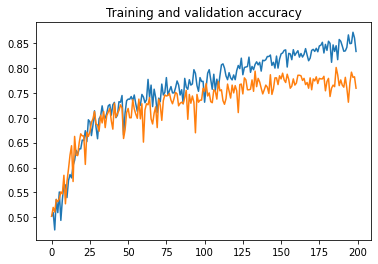

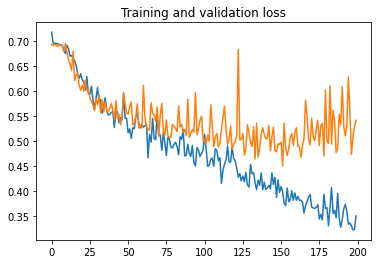

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [21]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(100, 100))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=32)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving download (2).jpg to download (2).jpg
[1.]
download (2).jpg is a dog


In [18]:
model.save('cats_and_dogs.h5')